In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cus = pd.read_csv("Customers.csv",sep=";")
cus.head(2)

,Customer_ID,First_Name,Last_Name,Postal_Code,City,Country,Score
0,1,Bill,Van Buren,78000,Versailles,France,76
1,2,Gerald,Jackson,60528,Frankfurt a.M.,Germany,74


In [3]:
ord = pd.read_csv("Orders.csv",sep = ";")
ord.head(2)
ord['Order_Date'].unique

<bound method Series.unique of 0        29/03/2019
1        14/07/2019
2        01/02/2019
3        13/03/2019
4        15/10/2019
            ...    
11802    15/06/2018
11803    27/06/2018
11804    26/02/2018
11805    26/01/2018
11806    12/09/2018
Name: Order_Date, Length: 11807, dtype: object>

In [4]:
pro = pd.read_csv("Products.csv",sep=";")
pro.head(2)

,Product_ID,Product_Name,Category,Sub_Category
0,1,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,2,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs


In [5]:
cu_or = pd.merge(cus,ord,on="Customer_ID",how = 'inner')
cu_or.head()

,Customer_ID,First_Name,Last_Name,Postal_Code,City,Country,Score,Order_ID,Product_ID,Order_Date,Shipping_Date,Sales,Quantity,Discount,Profit,Unit_Price
0,1,Bill,Van Buren,78000,Versailles,France,76,742,1326,18/04/2019,29/04/2019,186.304,4,0.2,13.9728,46.376
1,1,Bill,Van Buren,78000,Versailles,France,76,1409,444,11/06/2019,23/06/2019,150.800,5,0.2,56.5500,29.960
2,1,Bill,Van Buren,78000,Versailles,France,76,1951,1529,19/08/2020,11/09/2020,51.550,5,0.0,24.2285,10.310
3,1,Bill,Van Buren,78000,Versailles,France,76,2003,995,14/10/2020,18/10/2020,41.568,6,0.8,-66.5088,6.128
4,1,Bill,Van Buren,78000,Versailles,France,76,2147,1610,26/12/2020,02/01/2021,34.504,2,0.6,-15.5268,16.652


In [11]:
df = pd.merge(cu_or,pro,on="Product_ID",how = "inner")
df.head(2)

,Customer_ID,First_Name,Last_Name,Postal_Code,City,Country,Score,Order_ID,Product_ID,Order_Date,Shipping_Date,Sales,Quantity,Discount,Profit,Unit_Price,Product_Name,Category,Sub_Category
0,1,Bill,Van Buren,78000,Versailles,France,76,742,1326,18/04/2019,29/04/2019,186.304,4,0.2,13.9728,46.376,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",Furniture,Chairs
1,238,Dwight,Johnson,44087,Münster,Germany,0,5868,1326,06/12/2021,28/12/2021,232.880,5,0.2,17.4660,46.376,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",Furniture,Chairs


# Visualzations

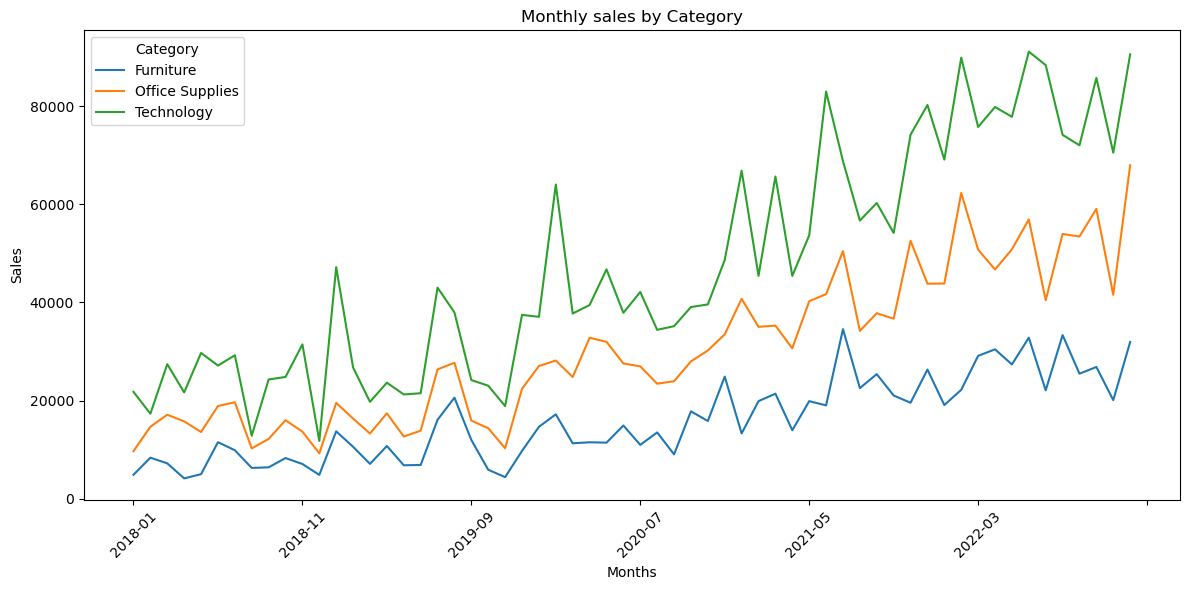

In [27]:
#creates a stacked bar chart showing sales by category with months on the x-axis 

df['Order_Date'] = pd.to_datetime(df['Order_Date']) #converting to datetime
df['Month'] = df['Order_Date'].dt.to_period('m').astype(str)

# # Filter for 2023 and 2024
# df = df[df['Order_Date'].dt.year.isin([2023, 2024])]

monthly_sales = df.groupby(['Month','Category'])['Sales'].sum().unstack(fill_value=0) # Group sales by Month and Category
monthly_sales = monthly_sales.sort_index()
monthly_sales.head()

# plot stacked bar chart
# monthly_sales.plot(kind='line',stacked = True,figsize=(12,6))
monthly_sales.plot(kind='bar',stacked = True,figsize=(12,6))
plt.title("Monthly sales by Category")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category')
plt.show()

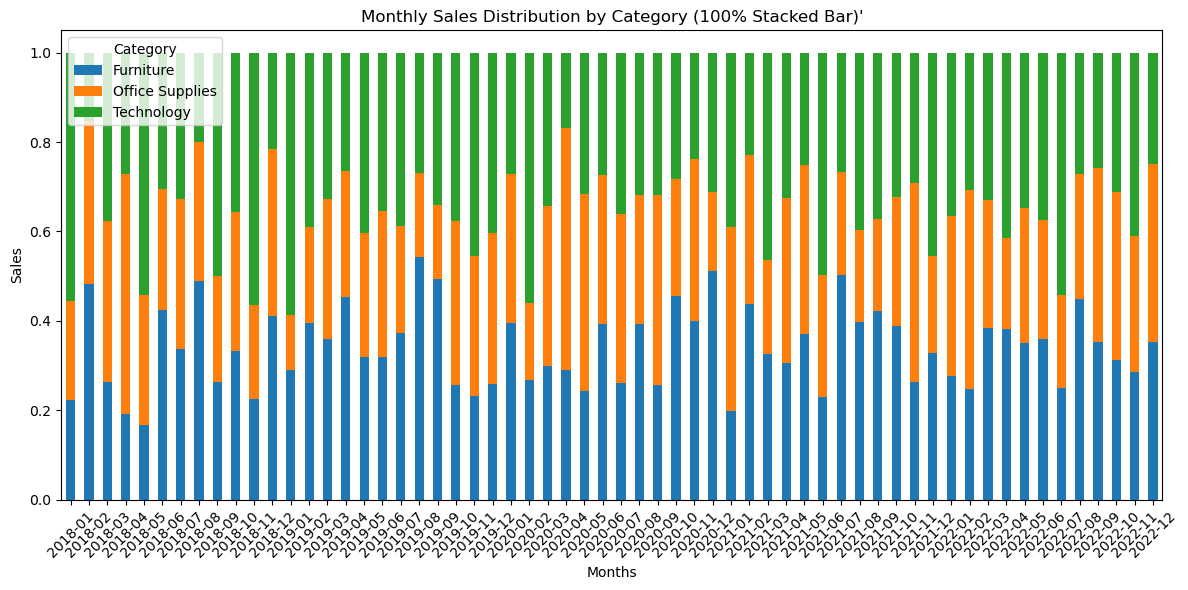

In [43]:
# create stacked bar chart as a part of whole

monthly_sales_per = monthly_sales.div(monthly_sales.sum(axis=1),axis=0)
monthly_sales_per
monthly_sales_per.plot(kind='bar',stacked = True,figsize=(12,6))
plt.title("Monthly Sales Distribution by Category (100% Stacked Bar)'")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Category',loc='upper left')
plt.show()

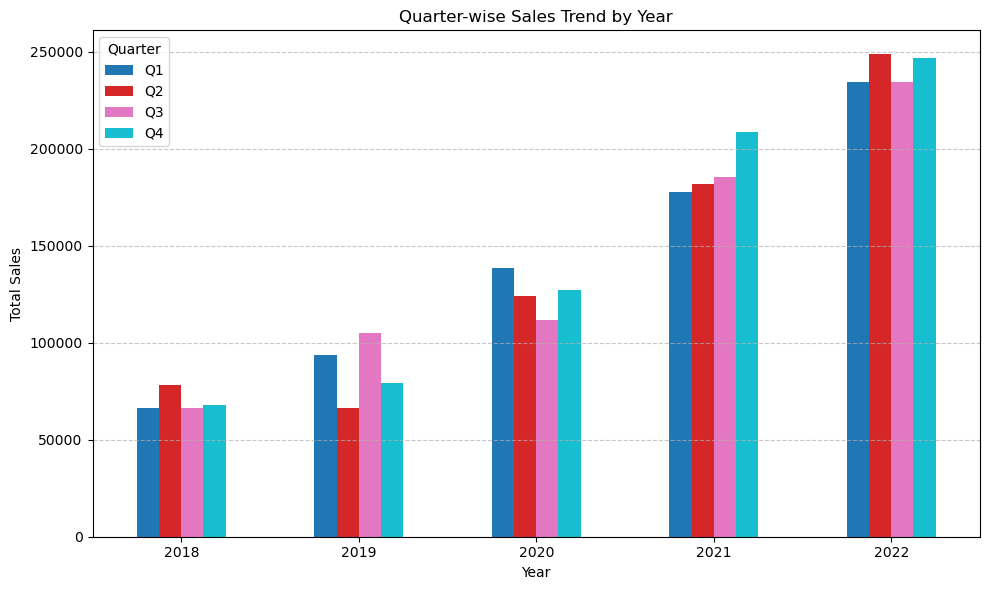

In [53]:
# Plot the trend

# Copy the full DataFrame
df1 = df.copy()

# Convert 'Order Date' to datetime
df1['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extract year and quarter
df1['Year'] = df1['Order_Date'].dt.year
df1['Quarter'] = df1['Order_Date'].dt.quarter

# Group sales by Year and Quarter
quarterly_sales = df1.groupby(['Year', 'Quarter'])['Sales'].sum().unstack(fill_value=0)

# Plot grouped bar chart (quarterly trends per year)
quarterly_sales.plot(kind='bar', figsize=(10, 6), colormap='tab10')
plt.title('Quarter-wise Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [121]:
df2 = df.copy()
grouped = df2.groupby('Sub_Category')[['Sales', 'Quantity']].sum().sort_values('Sales')
grouped
subcategories = grouped.index
subcategories
y = np.arange(len(subcategories))
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

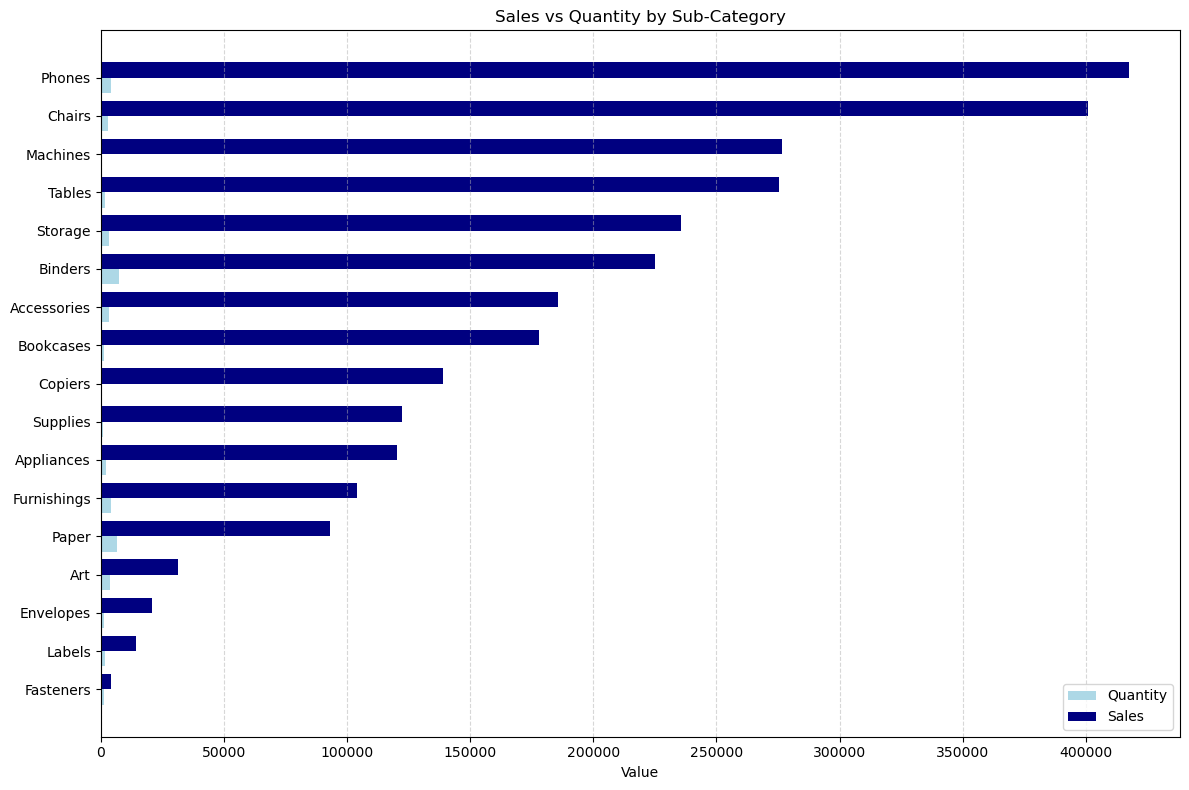

In [123]:
import numpy as np

# Copy the full DataFrame
df2 = df.copy()

# Group by Sub-Category and sum Quantity and Sales
grouped = df2.groupby('Sub_Category')[['Sales', 'Quantity']].sum().sort_values('Sales')

# Create figure and axis
plt.figure(figsize=(12, 8))

# Set position of bars on y-axis
subcategories = grouped.index
y = np.arange(len(subcategories))
bar_width = 0.4

# Plot Quantity (behind)
plt.barh(y - bar_width/2, grouped['Quantity'], height=bar_width, color='lightblue', label='Quantity')

# Plot Sales (in front)
plt.barh(y + bar_width/2, grouped['Sales'], height=bar_width, color='navy', label='Sales')

# Labels and styling
plt.yticks(y, subcategories)
plt.xlabel('Value')
plt.title('Sales vs Quantity by Sub-Category')
plt.legend()
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [65]:
subcategories = grouped.index
y = np.arange(len(subcategories))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

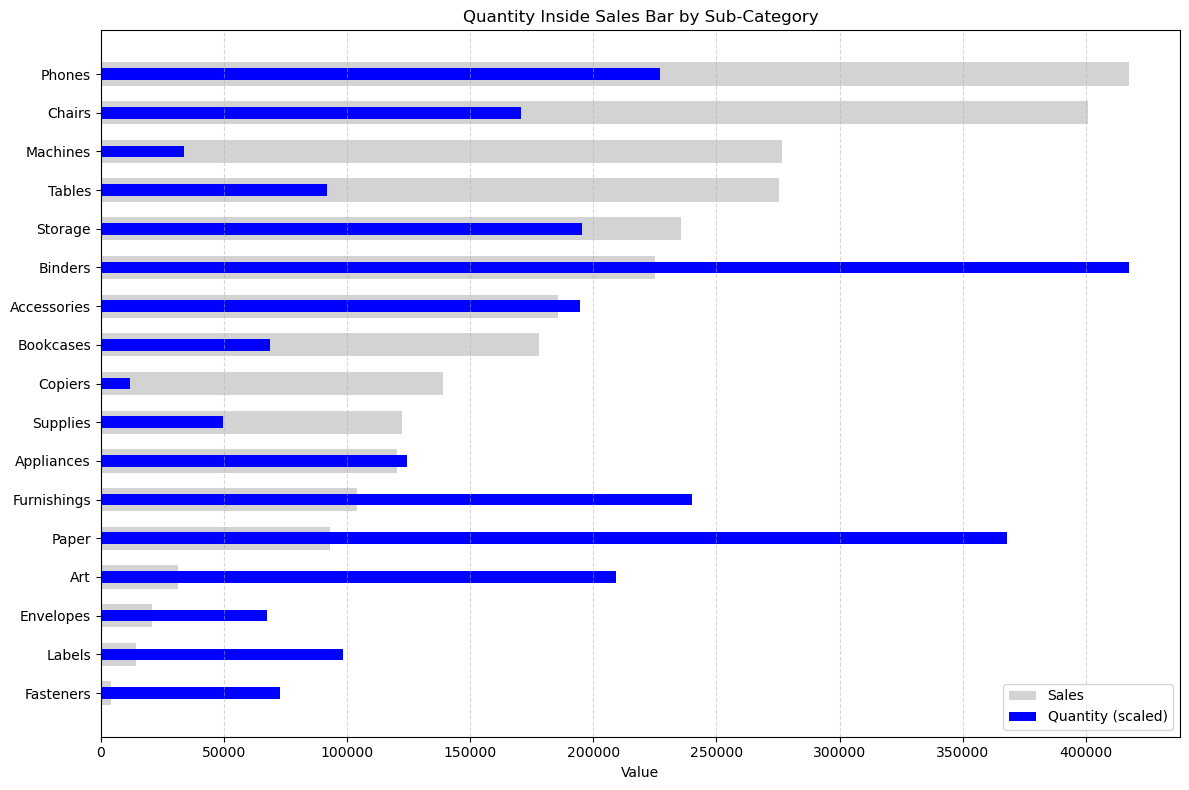

In [69]:
# Bar iN Bar PLOT

# Prepare the data
df3 = df.copy()

# Group by Sub-Category and sum both metrics
grouped = df3.groupby('Sub_Category')[['Sales', 'Quantity']].sum().sort_values('Sales')

# Normalize Quantity relative to max Sales, so it fits inside Sales bars
quantity_scaled = grouped['Quantity'] * (grouped['Sales'].max() / grouped['Quantity'].max())

# Set up plot
plt.figure(figsize=(12, 8))
subcategories = grouped.index
y = np.arange(len(subcategories))
bar_height = 0.6

# Plot outer (Sales) bars
plt.barh(y, grouped['Sales'], height=bar_height, color='lightgray', label='Sales')

# Plot inner (scaled Quantity) bars
plt.barh(y, quantity_scaled, height=bar_height * 0.5, color='blue', label='Quantity (scaled)')

# Labels and styling
plt.yticks(y, subcategories)
plt.xlabel('Value')
plt.title('Quantity Inside Sales Bar by Sub-Category')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


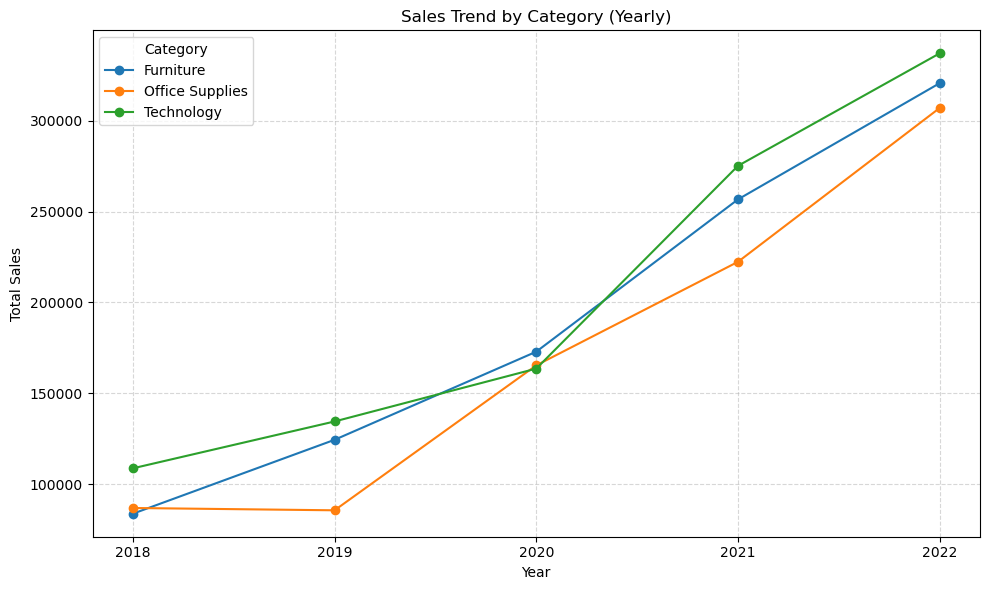

In [73]:
# Multiple line chart

# Copy and prepare data
df3 = df.copy()
df3['Order_Date'] = pd.to_datetime(df3['Order_Date'])

# Extract Year
df3['Year'] = df3['Order_Date'].dt.year

# Group by Year and Category
sales_by_year_category = df3.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Pivot for plotting
pivot_df = sales_by_year_category.pivot(index='Year', columns='Category', values='Sales').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
for category in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[category], marker='o', label=category)

# Styling
plt.title('Sales Trend by Category (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Category')
plt.xticks(pivot_df.index)  # ensure all years show
plt.tight_layout()
plt.show()


In [135]:
pivot_df = sales_by_year_category.pivot(index='Year', columns='Category', values='Sales').fillna(0)
pivot_df

Category,Furniture,Office Supplies,Technology
Year,,,
2018,83711.1725,86857.100,108692.885
2019,124384.7772,85581.408,134476.833
2020,172883.6265,165356.971,163569.246
2021,256691.3339,222339.602,275162.764
2022,320664.4292,307013.773,337083.274


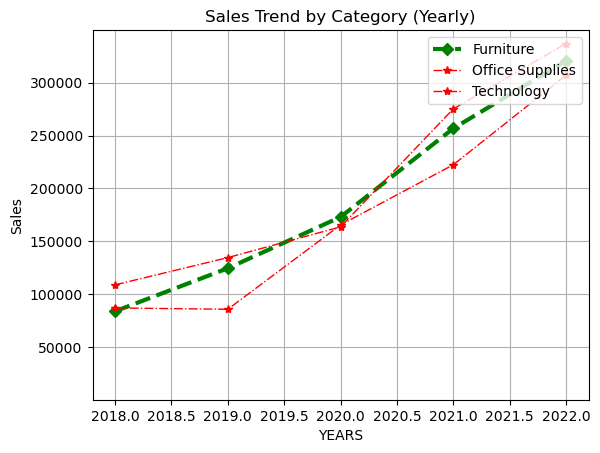

In [141]:

plt.plot(pivot_df.index,pivot_df['Furniture'],color='green',linestyle='dashed',linewidth=3,marker='D',label='Furniture')#solid ,dotted
plt.plot(pivot_df.index,pivot_df['Office Supplies'],color='red',linestyle= 'dashdot',linewidth=1,marker='*',label='Office Supplies')
plt.plot(pivot_df.index,pivot_df['Technology'],color='red',linestyle= 'dashdot',linewidth=1,marker='*',label='Technology')
plt.title('Sales Trend by Category (Yearly)')
plt.xlabel('YEARS')
plt.ylabel('Sales')
plt.legend(loc='upper right')#best in loc 
plt.ylim(0.200) #during outlier
plt.grid()
plt.show()# if graph are not plotted well in text editor since it is console its not needed

C:\Users\HP\AppData\Local\Temp\ipykernel_15216\1738288440.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4['Order_Date'] = pd.to_datetime(df4['Order_Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_15216\1738288440.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales = df4.groupby(['Month', 'Category'])['Sales'].sum().unstack()
C:\Users\HP\AppData\Local\Temp\ipykernel_15216\1738288440.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit = df4.groupby(['Month', 'Category'])['

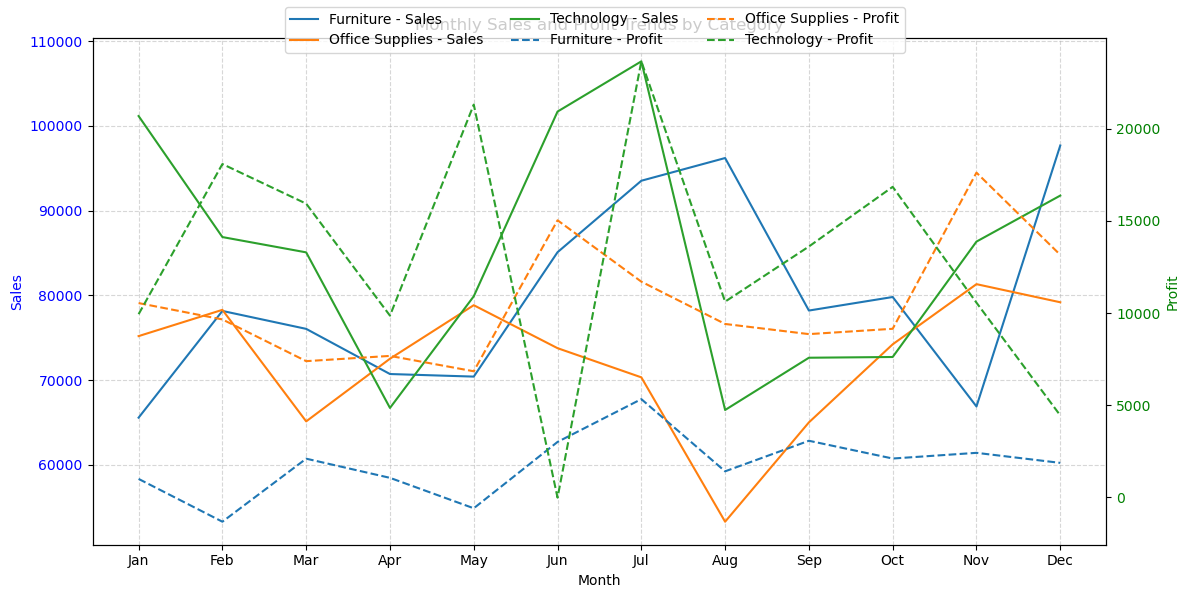

In [143]:
# Dual axis line plot

# Prepare data
df4 = df.copy()
df4['Order_Date'] = pd.to_datetime(df4['Order_Date'])
df4['Month'] = df4['Order_Date'].dt.strftime('%b')  # Short month names (Jan, Feb, ...)

# Optional: Ensure months are in order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df4['Month'] = pd.Categorical(df4['Month'], categories=month_order, ordered=True)

# Group by Month and Category for Sales and Profit
sales = df4.groupby(['Month', 'Category'])['Sales'].sum().unstack()
profit = df4.groupby(['Month', 'Category'])['Profit'].sum().unstack()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: Sales
for category in sales.columns:
    ax1.plot(sales.index, sales[category], label=f'{category} - Sales', linestyle='solid')

ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis: Profit
ax2 = ax1.twinx()
for category in profit.columns:
    ax2.plot(profit.index, profit[category], label=f'{category} - Profit', linestyle='dashed')

ax2.set_ylabel('Profit', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Monthly Sales and Profit Trends by Category')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', ncol=3)

plt.tight_layout()
plt.show()


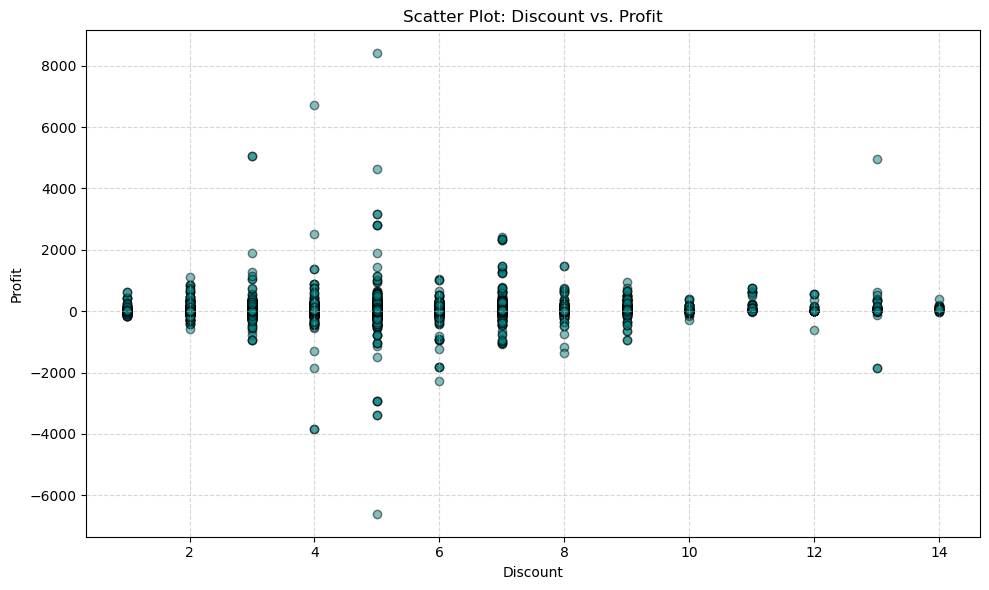

In [147]:
# Scatter plot: Discount vs. Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Profit'], alpha=0.5, color='teal', edgecolor='k')

# Labels and title
plt.title('Scatter Plot: Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_15216\3750670662.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['Order_Date'] = pd.to_datetime(df5['Order_Date'])


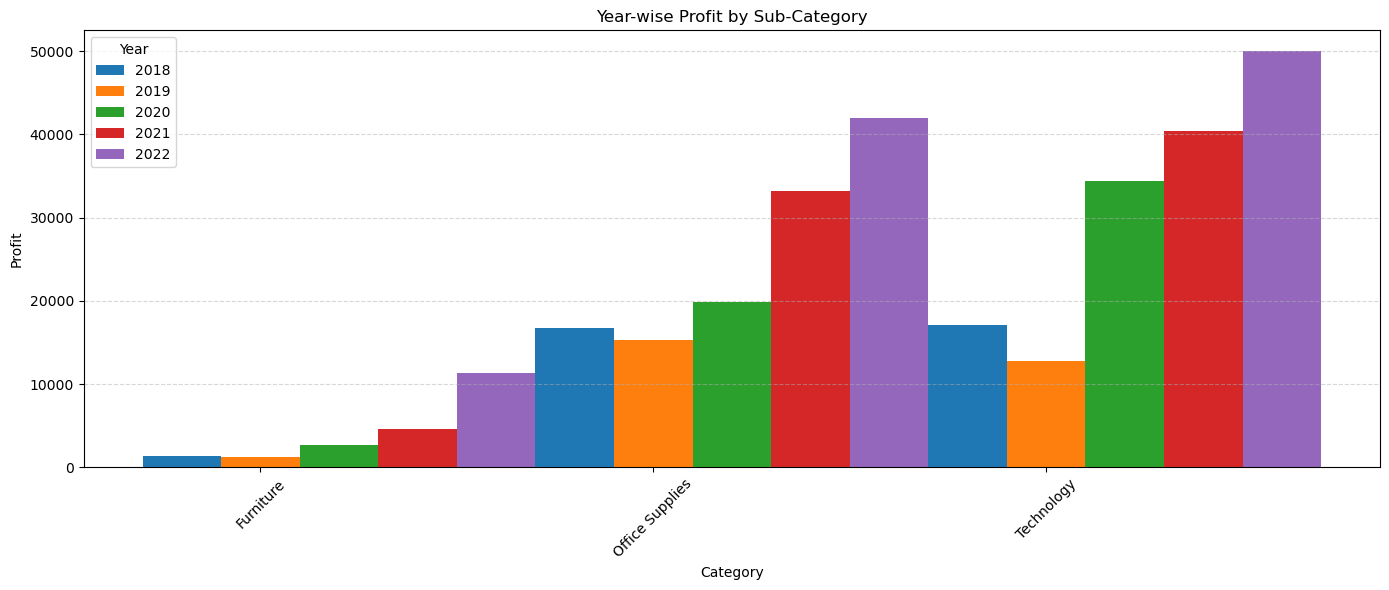

In [153]:
# Prepare the data
df5 = df.copy()
df5['Order_Date'] = pd.to_datetime(df5['Order_Date'])
df5['Year'] = df5['Order_Date'].dt.year

# Group by Sub-Category and Year for Profit
profit_by_cat_year = df5.groupby(['Category', 'Year'])['Profit'].sum().reset_index()

# Pivot to get years as columns
pivot_df = profit_by_cat_year.pivot(index='Category', columns='Year', values='Profit').fillna(0)

# Plot setup
x = np.arange(len(pivot_df))  # X locations for each sub-category
width = 0.2  # Width of each bar
years = pivot_df.columns.tolist()

# Create figure
plt.figure(figsize=(14, 6))

# Plot bars for each year with shifting
for i, year in enumerate(years):
    plt.bar(x + i * width - width, pivot_df[year], width=width, label=str(year))

# X-axis labels
plt.xticks(x, pivot_df.index, rotation=45)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Year-wise Profit by Sub-Category')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()


In [161]:
pivot_df = profit_by_cat_year.pivot(index='Category', columns='Year', values='Profit').fillna(0)
pivot_df

Year,2018,2019,2020,2021,2022
Category,,,,,
Furniture,1398.0414,1223.0508,2628.6843,4648.9253,11354.4289
Office Supplies,16739.5384,15302.3155,19812.0354,33161.6767,41955.8847
Technology,17132.8186,12789.7392,34456.0827,40453.1541,50010.3184


In [165]:
# Create figure
plt.figure(figsize=(14, 6))

# Plot bars for each year with shifting
plt.bar(np.arange(pivot_df.shape[0]) - 0.4, pivot_df['2018'], width=0.2, label='2018')
plt.bar(np.arange(pivot_df.shape[0]) - 0.2, pivot_df['2019'], width=0.2, label='2019')
plt.bar(np.arange(pivot_df.shape[0]), pivot_df['2020'], width=0.2, label='2020')
plt.bar(np.arange(pivot_df.shape[0]) + 0.2, pivot_df['2021'], width=0.2, label='2021')
plt.bar(np.arange(pivot_df.shape[0]) + 0.4, pivot_df['2022'], width=0.2, label='2022')

# X-axis labels and adjustments
plt.xticks(np.arange(pivot_df.shape[0]), pivot_df.index, rotation=45)

# Labels and title
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Year-wise Profit by Category')

# Add legend
plt.legend(title='Year')

# Grid setup
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tight layout to prevent overlapping
plt.tight_layout()

# Show plot
plt.show()


KeyError: '2018'

<Figure size 1400x600 with 0 Axes>

In [163]:

plt.bar(np.arange(pivot_df.shape[0])-0.4,df['2018'],width=0.2)
plt.bar(np.arange(pivot_df.shape[0])-0.2,df['2019'],width=0.2)
plt.bar(np.arange(pivot_df.shape[0]),df['2020'],width=0.2)
plt.bar(np.arange(pivot_df.shape[0])-0.2,df['2021'],width=0.2)
plt.bar(np.arange(pivot_df.shape[0])+.4,df['2022'],width=0.2)
plt.xticks(np.arange(df.shape[0]),df['Category'])# when want to replace tilte
plt.xticks(rotation=45)
plt.show()

KeyError: '2018'